#1- CONTEXTE

le but est de concevoir un modele de regression lineaire capable d'effectuer une prediction des prix des loyers a partir de la surface habitable des maison. Pour cela nous utiliserons le celebre dataset BostonHousing disponible sur scikit-learn. Voici une brève description de chaque variable du jeu de données Boston Housing :

- MedInc : Revenu médian des ménages dans le secteur.
- HouseAge : Âge médian des maisons dans le secteur.
- AveRooms : Nombre moyen de pièces par logement.
- AveBedrms : Nombre moyen de chambres à coucher par logement.
- Population : Population du secteur.
- AveOccup : Nombre moyen d’occupants par logement.
- Latitude : Latitude géographique du secteur.
- Longitude : Longitude géographique du secteur.
- MEDV : Valeur médiane des maisons occupées par leurs propriétaires (en milliers de dollars).

#2- COLLECTE DES DONNEES

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np

housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MEDV'] = housing.target

In [2]:
display(df.head(10))

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


# 3- PRETRAITEMENT DES DONNEES

In [3]:
import math

def arrondi(x):
  """Arrondi un nombre décimal par excès ou par défaut selon la partie décimale."""
  if x - math.floor(x) < 0.5:
    return math.floor(x)
  else:
    return math.ceil(x)

#Le nombre de pieces (AveRooms), de chambres (AveBedrms) et d'occupants (AveOccup) par logement sont des variables de type entier. On va donc les convertir en int en arrondissant les donnees. Si la parite decimale est inferieur a 0.5 on arrondi par defaut sinon, on arrondi par exces
df['AveRooms'] = df['AveRooms'].apply(arrondi).astype(int)
df['AveBedrms'] = df['AveBedrms'].apply(arrondi).astype(int)
df['AveOccup'] = df['AveOccup'].apply(arrondi).astype(int)

# Puis on va les convertir en float pour notre modele car toutes les autres variables sont de type float
df['AveRooms'] = df['AveRooms'].astype(float)
df['AveOccup'] = df['AveOccup'].astype(float)
df['AveBedrms'] = df['AveBedrms'].astype(float)

df.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,7.0,1.0,322.0,3.0,37.88,-122.23,4.526
1,8.3014,21.0,6.0,1.0,2401.0,2.0,37.86,-122.22,3.585
2,7.2574,52.0,8.0,1.0,496.0,3.0,37.85,-122.24,3.521
3,5.6431,52.0,6.0,1.0,558.0,3.0,37.85,-122.25,3.413
4,3.8462,52.0,6.0,1.0,565.0,2.0,37.85,-122.25,3.422
5,4.0368,52.0,5.0,1.0,413.0,2.0,37.85,-122.25,2.697
6,3.6591,52.0,5.0,1.0,1094.0,2.0,37.84,-122.25,2.992
7,3.1200,52.0,5.0,1.0,1157.0,2.0,37.84,-122.25,2.414
8,2.0804,42.0,4.0,1.0,1206.0,2.0,37.84,-122.26,2.267
9,3.6912,52.0,5.0,1.0,1551.0,2.0,37.84,-122.25,2.611


In [4]:
# Affichons les statisques des variables
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   MEDV        20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.426647,1.045446,1425.476744,3.076696,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.492850,0.475545,1132.462122,10.387281,2.135952,2.003532,1.153956
min,0.499900,1.000000,1.000000,0.000000,3.000000,1.000000,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.000000,1.000000,787.000000,2.000000,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.000000,1.000000,1166.000000,3.000000,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.000000,1.000000,1725.000000,3.000000,37.710000,-118.010000,2.647250
max,15.000100,52.000000,142.000000,34.000000,35682.000000,1243.000000,41.950000,-114.310000,5.000010


In [5]:
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MEDV,0


#4- ANALYSE UNIVARIEE

<function matplotlib.pyplot.show(close=None, block=None)>

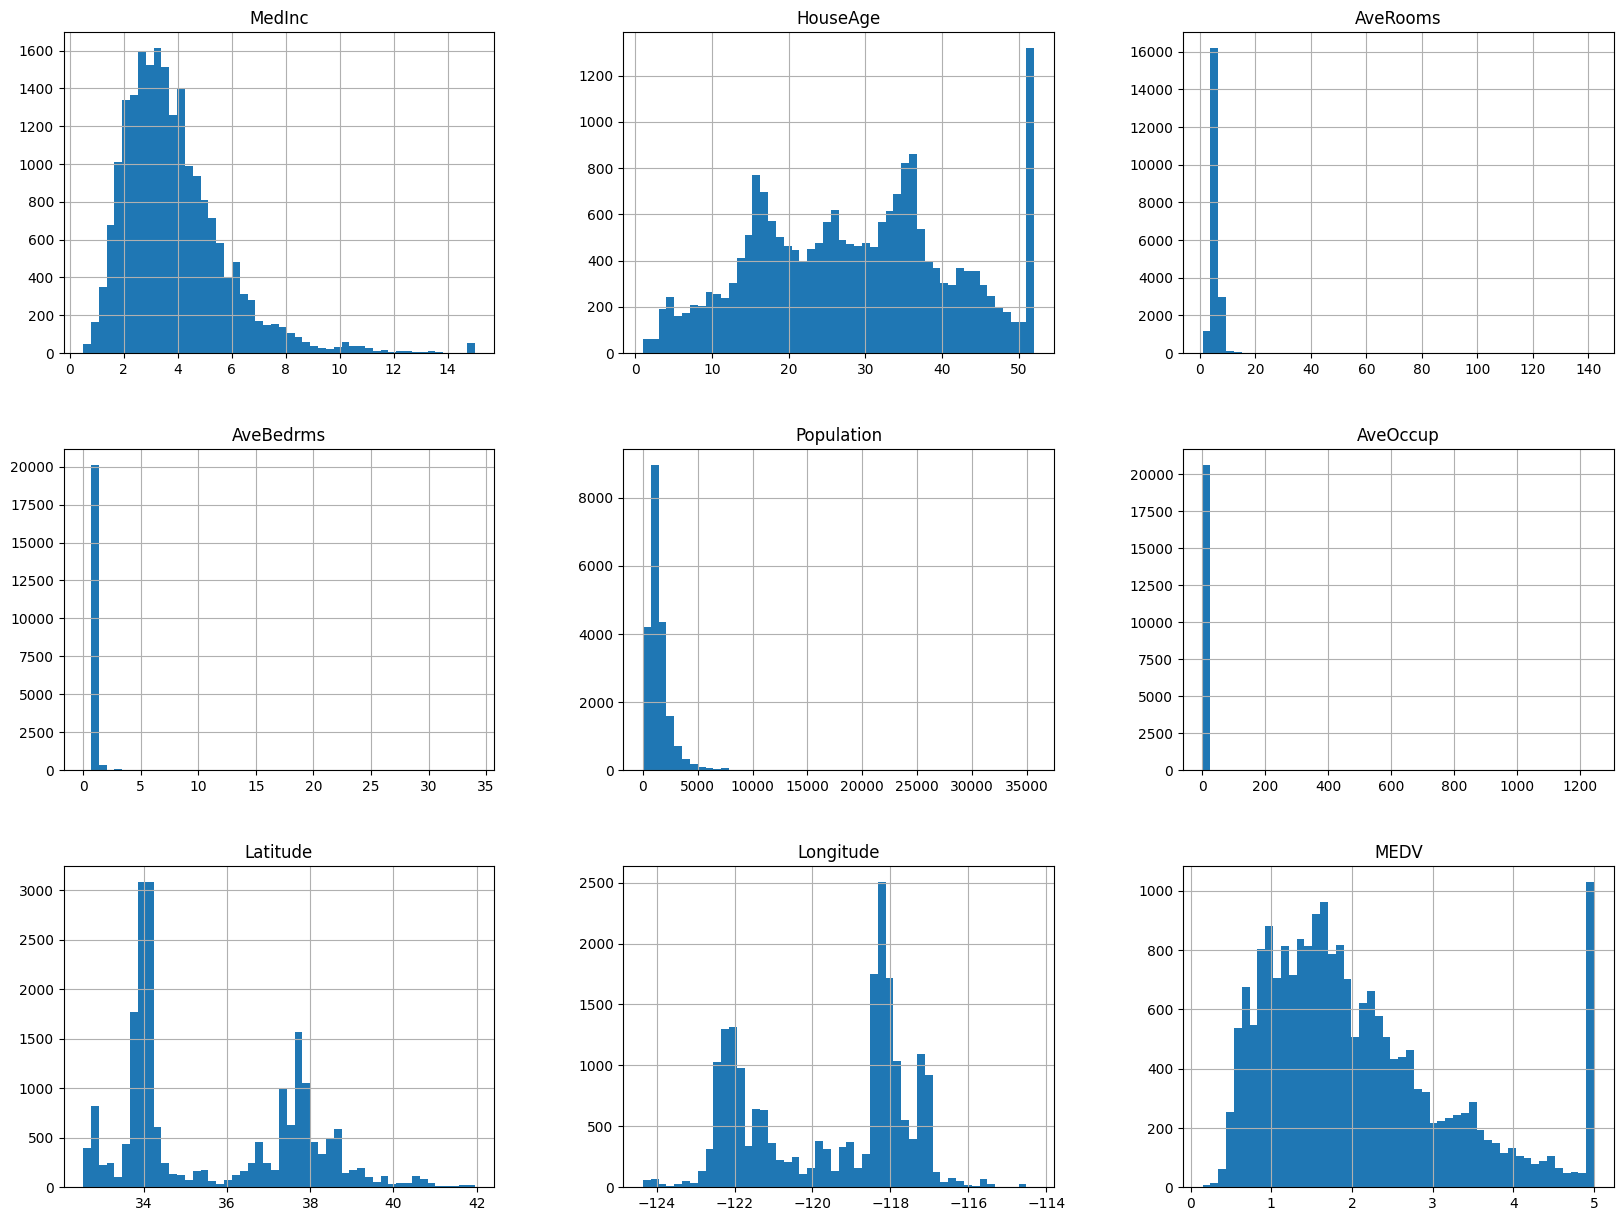

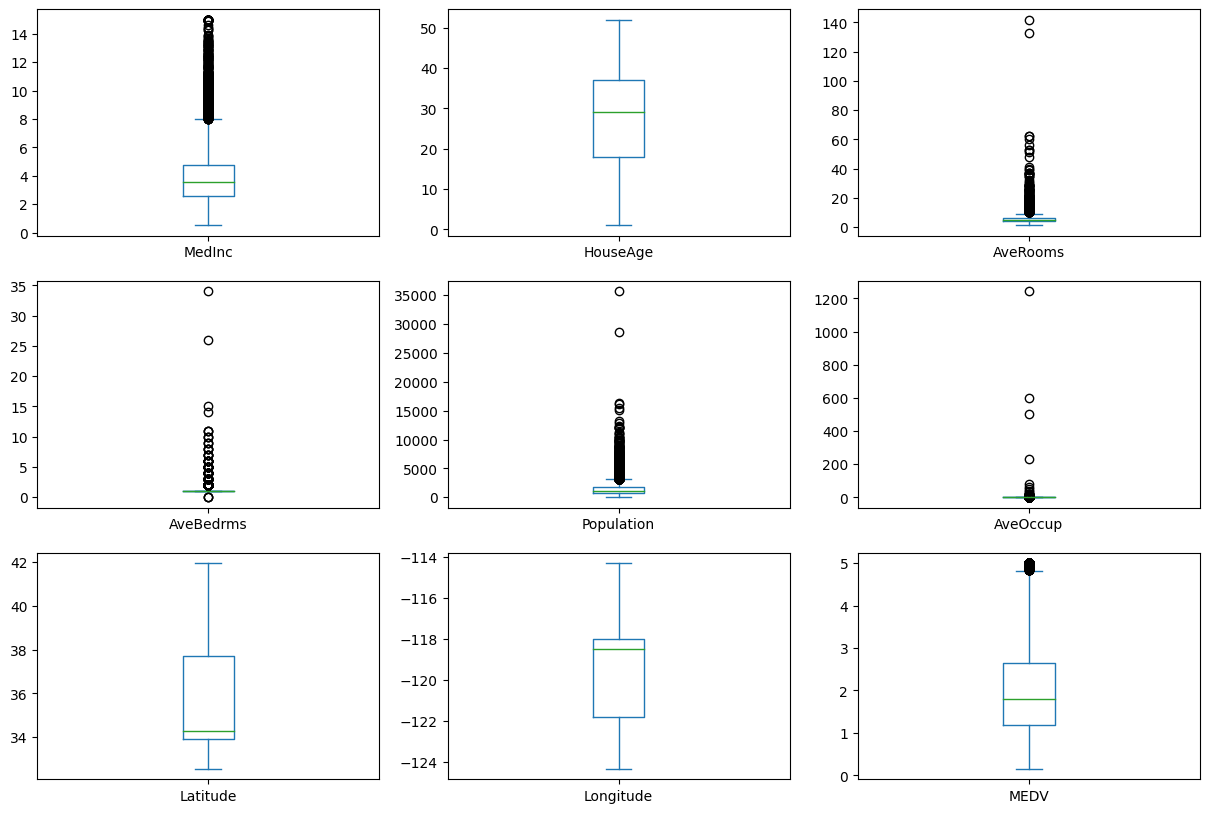

In [6]:
 import matplotlib.pyplot as plt

# Histogramme
df.hist(bins=50, figsize=(20,15))
plt.show

# Boxplot
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(15,10))
plt.show

#5- ANALYSE BIVARIEE

<function matplotlib.pyplot.show(close=None, block=None)>

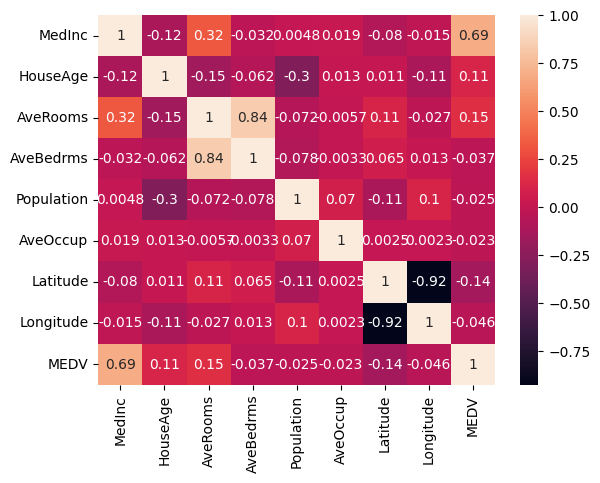

In [7]:
import seaborn as sns

# Matrice de corrélation
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show

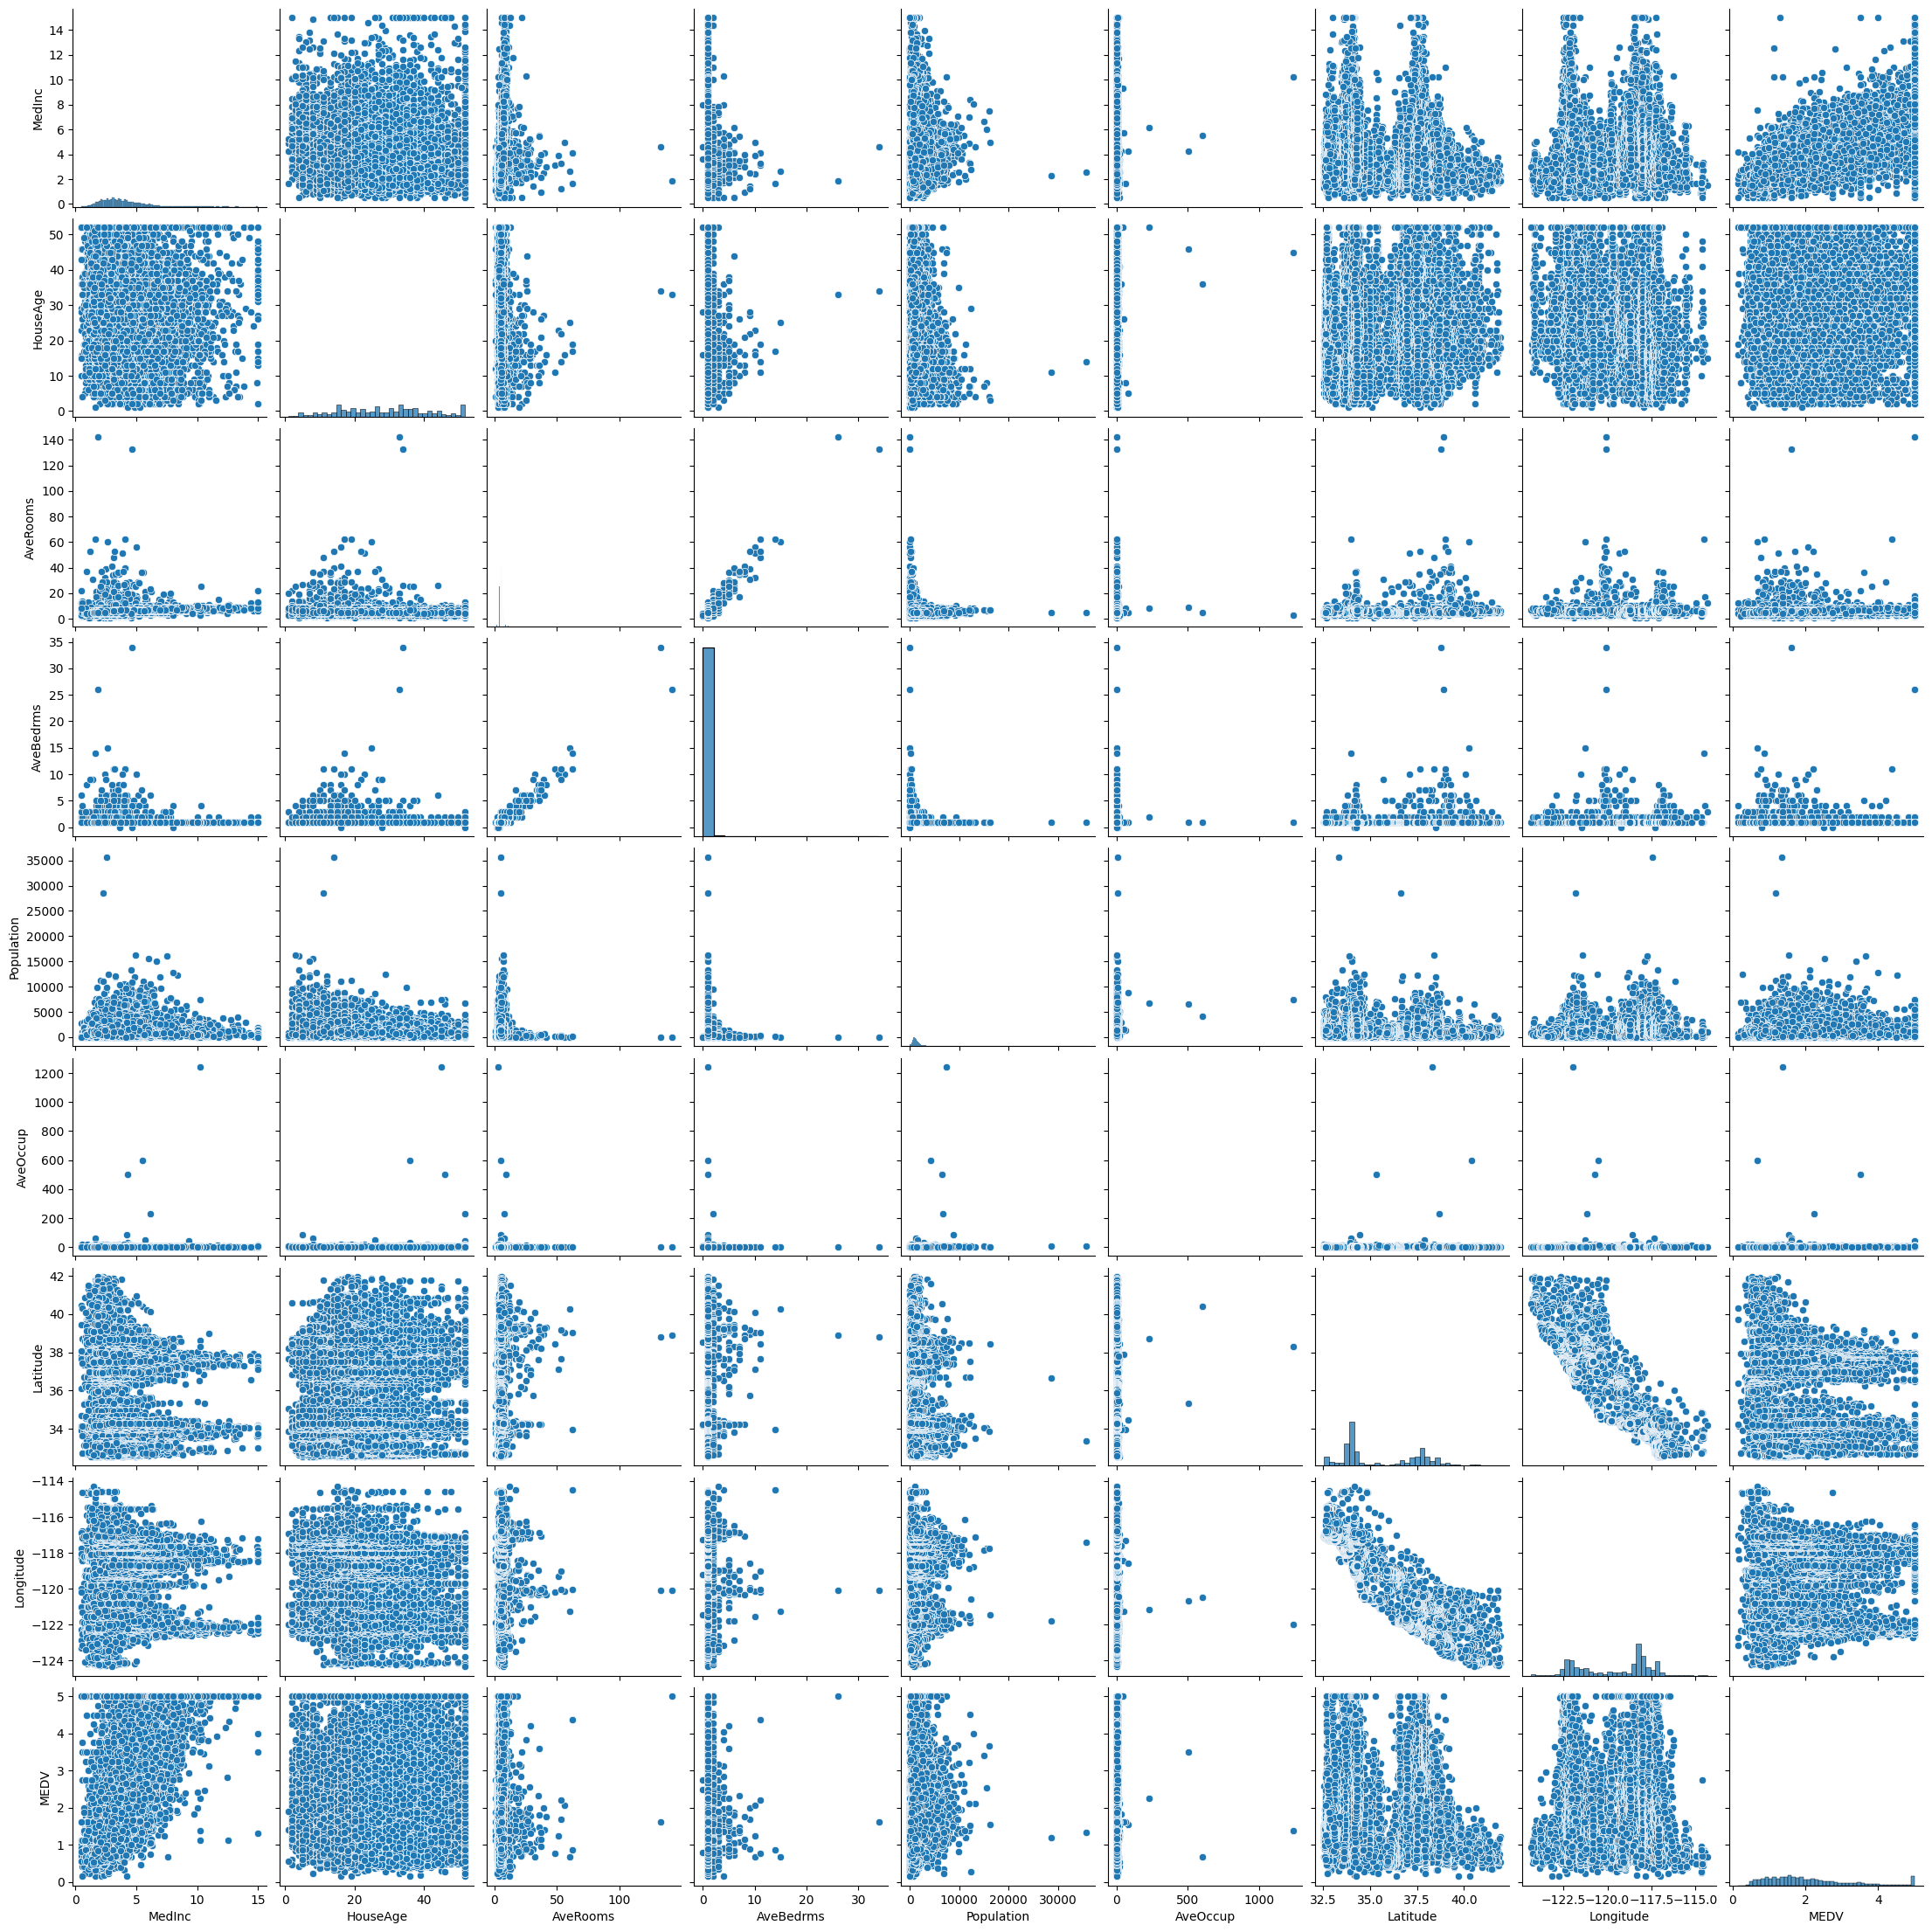

In [8]:
sns.pairplot(df)

In [9]:
from sklearn.model_selection import train_test_split
x = df.drop('MEDV', axis=1)
y = df['MEDV']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#6- IMPLEMENTATION DU MODELE

In [10]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Regresion lineaire
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Regresion lineaire")
print("Mean squared error: ", mse)
print("R2 score: ", r2)

# Regression Lasso
model1 = Lasso(alpha=0.1)
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)
mse = mean_squared_error(y_test, y_pred1)
r2 = r2_score(y_test, y_pred1)
print("Regression lasso")
print("Mean squared error: ", mse)
print("R2 score: ", r2)

# Regression Ridge
model2 = Ridge(alpha=1)
model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)
mse = mean_squared_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)
print("Regression ridge")
print("Mean squared error: ", mse)
print("R2 score: ", r2)

Regresion lineaire
Mean squared error:  0.5523510443697549
R2 score:  0.578489575742045
Regression lasso
Mean squared error:  0.613525676085539
R2 score:  0.5318059580840637
Regression ridge
Mean squared error:  0.552325873156563
R2 score:  0.5785087844117122


#7- VISUALISATION DES RESULTATS

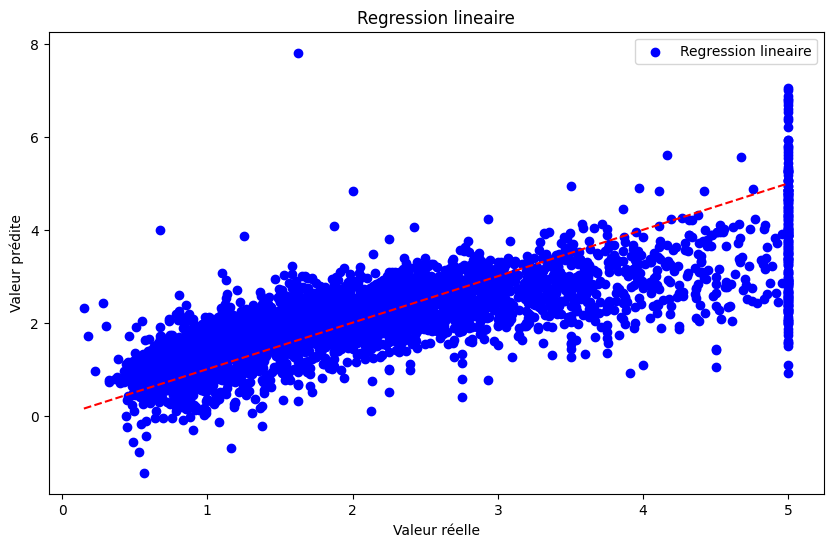

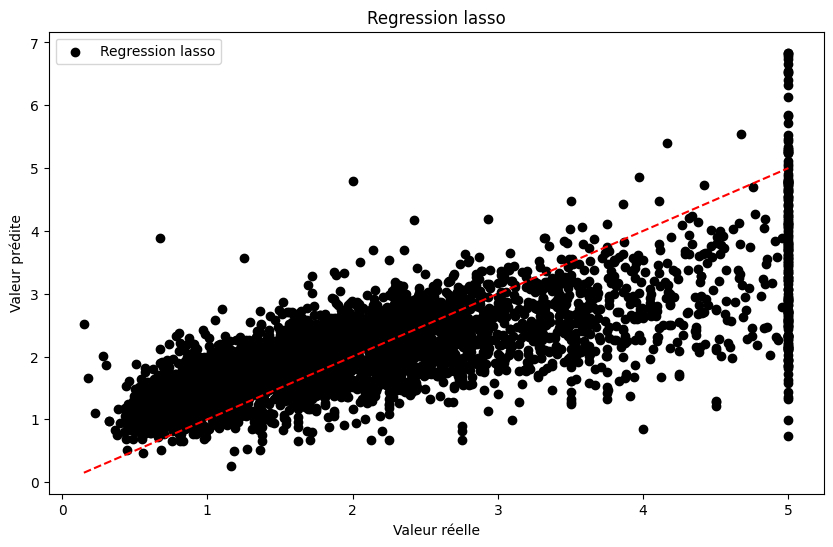

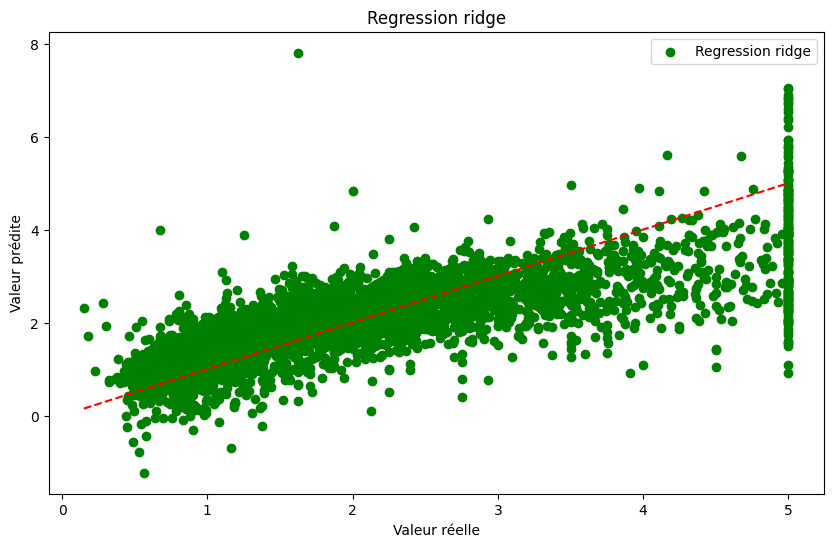

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Regression lineaire')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Valeur réelle')
plt.ylabel('Valeur prédite')
plt.title('Regression lineaire')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred1, color='black', label='Regression lasso')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Valeur réelle')
plt.ylabel('Valeur prédite')
plt.title('Regression lasso')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred2, color='green', label='Regression ridge')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Valeur réelle')
plt.ylabel('Valeur prédite')
plt.title('Regression ridge')
plt.legend()
plt.show()


In [11]:
nouvelle_donnee = pd.DataFrame({
    'MedInc': [7.0],
    'HouseAge': [40.0],
    'AveRooms': [5.0],
    'AveBedrms': [2.0],
    'Population': [1000.0],
    'AveOccup': [3.0],
    'Latitude': [37.0],
    'Longitude': [-122.0]
})

prediction = model.predict(nouvelle_donnee)
prediction1 = model1.predict(nouvelle_donnee)
prediction2 = model2.predict(nouvelle_donnee)


print("le prix de cette maison avec la regression lineaire est:", prediction)
print("le prix de cette maison avec lasso est:", prediction1)
print("le prix de cette maison avec ridge est:", prediction2)


le prix de cette maison avec la regression lineaire est: [4.34327229]
le prix de cette maison avec lasso est: [3.54700118]
le prix de cette maison avec ridge est: [4.34235717]


#8- CONCLUSION

Ridge est le modele le plus adapte pour notre modele car il a une MSE et r2-score legerement au dessus de la lineaire qui elle meme est au dessus de Lasso

